In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# retreiving all columns

columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis


In [32]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent

('2017-08-23',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
engine.execute("select * from measurement limit 10").fetchall()
session.query(func.count(measurement.date)).all()

# Starting from the most recent data point in the database. 
recent = session.query(func.max(measurement.date)).all()
recent

# Calculate the date one year from the last date in data set.
session.query(measurement.date >= '2016-08-23').\
    filter(measurement.date <= '2017-08-23').\
    order_by(measurement.date).all()

[(False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),

<Figure size 432x288 with 0 Axes>

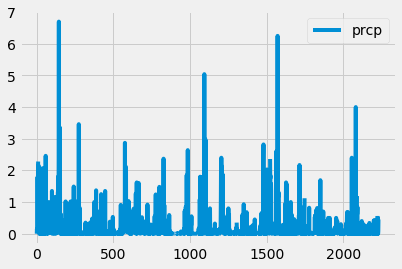

<Figure size 432x288 with 0 Axes>

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)
recent_date

# Calculate the date one year from the last date in data set.
year = recent_date - dt.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores

cal = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
    filter(measurement.date <= "2017-08-23").\
    order_by(measurement.date).all()
cal

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(cal, columns=["date", "prcp"])
                                        

# Sort the dataframe by date
results_df.sort_values(by="date", ascending=True)
results_df.rename(columns= {'date': "Date", 'prcp':"Precipitation"})
results_df.set_index('date')
results_df.head

# Use Pandas Plotting with Matplotlib to plot the data

results_df.plot()
plt.figure()

In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe

<bound method NDFrame.describe of             date  prcp
0     2016-08-23  0.00
1     2016-08-23  0.15
2     2016-08-23  0.05
3     2016-08-23   NaN
4     2016-08-23  0.02
...          ...   ...
2225  2017-08-22  0.50
2226  2017-08-23  0.00
2227  2017-08-23  0.00
2228  2017-08-23  0.08
2229  2017-08-23  0.45

[2230 rows x 2 columns]>

# Exploratory Station Analysis


In [65]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(func.count(station.station)).all()
stations

[(9,)]

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# active_stations = session.query(meausrement.station, func.count(measurement.station)).group_by(measurement.station).order_by)func.count(measurement.station).desc().all()
# active_stations
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# refferring to columns

columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [30]:
# Using the most active station id from the previous query, calculate the lowest, 
#highest, and average temperature.
temperatures = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

observation = session.query(*temperatures).filter_by(station = 'USC00519281').all()
print(observation)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


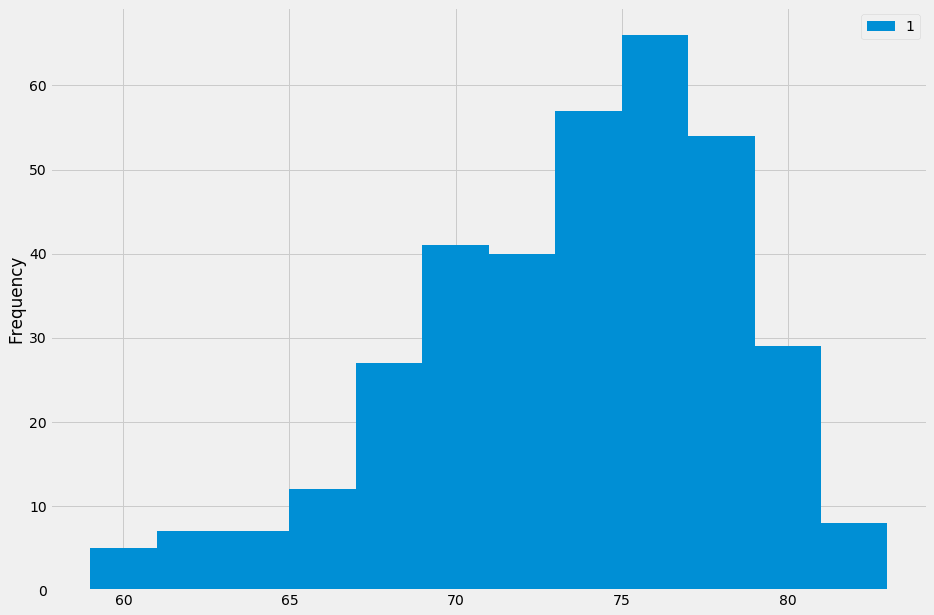

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and 
#plot the results as a histogram
past_12_months = session.query(measurement.date, measurement.tobs).filter_by(station = 'USC00519281').filter(measurement.date >= year).all()

past_12_months_df = pd.DataFrame(past_12_months)
past_12_months_df.plot.hist(bins = 12, figsize = (14,10))

# Close session

In [40]:
# Close Session
session.close()